# Skript: 02_03_3_Modul_Pandas_Graphiken

### Lernziele:
- Kombinieren von Matplotlib mit Pandas - aus Werten direkt Graphik generieren
- xticks für mehr Beschriftungs-Werte in der X-Achse
- zusätzliche y-Achse
- Balkendiagramme in Verbindung mit Pandas-Objekten
- Kreisdiagramme

Die Möglichkeiten von matplotlib können durch Pandas erweitert und 
anschlaulichere Grafik einfacher erzeugt werden.

In [1]:
# Erzeugen von Beispieldaten aus einem Dictionary
import pandas as pd
import matplotlib.pyplot as plt
cities = {"Name": ["London", "Berlin", "Madrid", "Rom", 
                   "Paris", "Wien", "Bukarest", "Hamburg", 
                   "Budapest", "Warschau", "Barcelona", 
                   "München", "Mailand"],
          "Bevölkerung": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "Fläche" : [1572, 891.85, 605.77, 1285, 
                    105.4, 414.6, 228, 755, 
                    525.2, 517, 101.9, 310.4, 
                    181.8]
}
city_frame = pd.DataFrame(cities,
                          columns=["Bevölkerung", "Fläche"],
                          index=cities["Name"])
print(city_frame.head())

        Bevölkerung   Fläche
London      8615246  1572.00
Berlin      3562166   891.85
Madrid      3165235   605.77
Rom         2874038  1285.00
Paris       2273305   105.40


#### Der Plot auf einen DataFrame erzeugt schon von Beginn an gute Ergebnisse, z. B. eine Legende

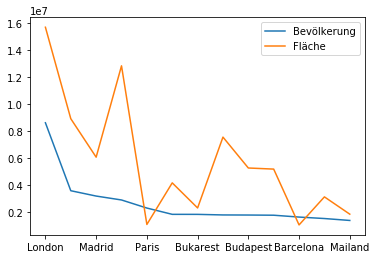

In [2]:
city_frame["Fläche"] *= 10000    # Multiplikation mit 10000, 
                                 # um die Bevölkerungslinie 
                                 # proportional besser 
                                 # darzutellen
city_frame.plot()
plt.show()

### Einsetzen von xticks, um in der X-Achse mehr Werte darzustellen

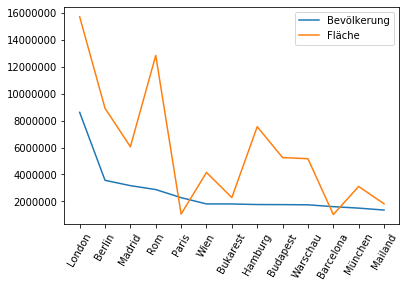

In [3]:
import matplotlib
city_frame.plot(xticks=range(len(city_frame.index)),
                rot=60)                                     # red erzeugt Schrägstellung --> 60°
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))# Umsetzung der wissenschaftlichen Notation
plt.show()
# -> https://matplotlib.org/3.1.1/api/ticker_api.html

### Darstellung einer zusätzlichen y-Achse mit twinx-Funktion uns subplots

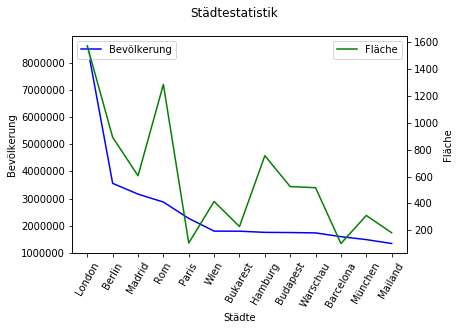

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.suptitle("Städtestatistik")
ax.set_ylabel("Bevölkerung")
ax.set_xlabel("Städte")
ax2 = ax.twinx()
ax2.set_ylabel("Fläche")
line1 = city_frame["Bevölkerung"].plot(ax=ax, 
                                       style="b-",
                                       xticks=range(len(city_frame.index)),
                                       use_index=True, 
                                       rot=60)
line2 = city_frame["Fläche"].plot(ax=ax2, 
                                  style="g-")
ax.legend(["Bevölkerung"], loc=2)
ax2.legend(loc=1)
plt.show()

### 2 y-Achsen

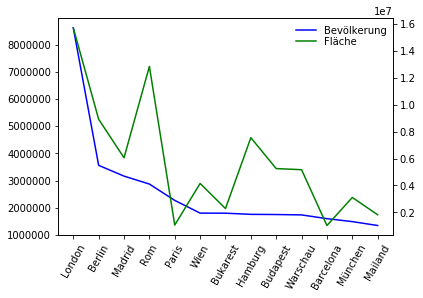

In [4]:
import matplotlib.pyplot as plt
ax1 = city_frame["Bevölkerung"].plot(style="b-",
                                     xticks=range(len(city_frame.index)),
                                     use_index=True, 
                                     rot=60)
ax2 = ax1.twinx()
#ax2.spines['right'].set_position(('axes', 1.0))
city_frame["Fläche"].plot(ax=ax2,
                          style="g-")
ax1.legend(loc=(.7,.9), frameon = False)
ax2.legend( loc=(.7, .85), frameon = False)

Die Herausforderungen in dem folgenden Beispiel sind:
Einlesen Datei mit 5 Spalten und Reduzieren auf 2 Spalten inkl. Index-Spalte
        Spalten 'Juli_2019', 'Juli_2018', 'Ratings', 'Change'
Entfernen von Prozent-Zeichen in Spalten "Ratings"


                      Juli_2019  Juli_2018  Ratings  Change
Programming_Language                                       
Java                          1          1   15.058  -1.08%
C                             2          2   14.211  -0.45%
Python                        3          4    9.260  +2.90%
C++                           4          3    6.705  -0.91%
C#                            5          6    4.365  +0.57%
Visual Basic .NET             6          5    4.208  -0.04%
JavaScript                    7          8    2.304  -0.53%
PHP                           8          7    2.167  -0.67%
SQL                           9          9    1.977  -0.36%
Objective-C                  10         10    1.686  +0.23%
Ruby                         11         12    1.636  +0.43%
Assembly language            12         13    1.390  +0.24%
Swift                        13         11    1.121  -0.29%
MATLAB                       14         15    1.078  -0.05%
Groovy                       15         

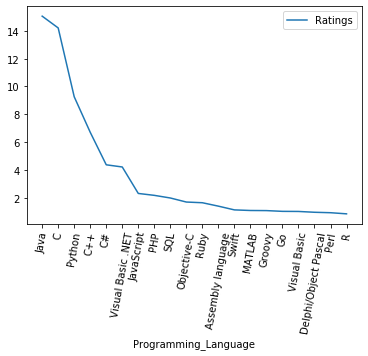

In [5]:
def strip_percentage_sign(x):
    return float(x.strip('%'))
#filename = "D:/python/DataSets/d_kunde.csv"
data_path = "D:/Python/datasets/"
progs = pd.read_csv(data_path + "Tiobe_Index_Julie_2019.txt", 
                   quotechar='"',
                   thousands=",",
                   index_col=2,
                   converters={'Ratings':strip_percentage_sign},
                   delimiter=r"\s+")
print(progs)
print(progs.columns)

progs_2 =  pd.DataFrame(progs, columns=['Ratings'])   # Neues DataFrame-Objekt machen

print(progs_2)
progs_2.plot(xticks=range(len(progs_2.index)),
           use_index=True, 
           rot=80)
plt.show()

### Balkendiagramme mit Pandas

Text(0.5, 0, 'Prgrammiersprachen-Rating Juli 2019')

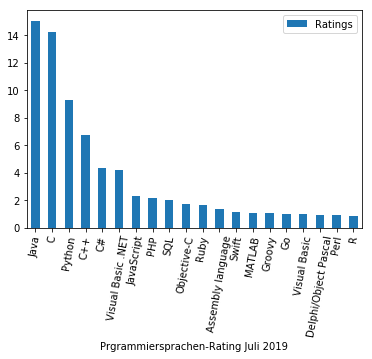

In [51]:
progs_2.plot(kind="bar",rot=80)
plt.xlabel('Prgrammiersprachen-Rating Juli 2019')

### Kreisdiagramme

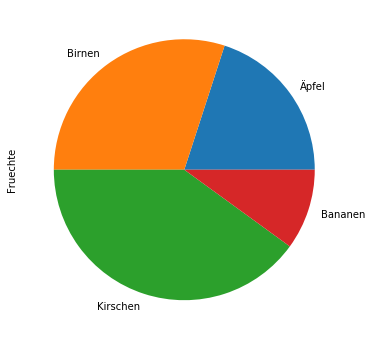

In [6]:
import pandas as pd
fruechte = ['Äpfel', 'Birnen', 'Kirschen', 'Bananen']
series = pd.Series([20, 30, 40, 10], 
                   index=fruechte, 
                   name='Fruechte')
series.plot.pie(figsize=(6, 6))

"Herausziehen der Kuchenstücke."  -> explode-Schlüsselwort

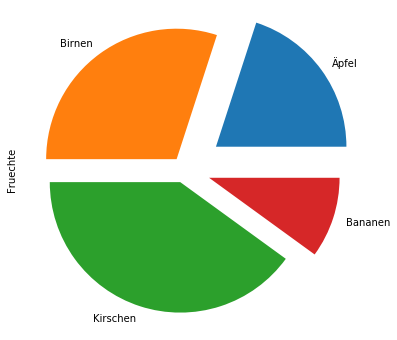

In [7]:
import pandas as pd
fruechte = ['Äpfel', 'Birnen', 'Kirschen', 'Bananen']
series = pd.Series([20, 30, 40, 10], 
                   index=fruechte, 
                   name='Fruechte')
explode = [0.3, 0.10, 0.10, 0.2]              # Abstände vom zentralen Punkt
series.plot.pie(figsize=(6, 6), explode=explode)

Text(0, 0.5, '')

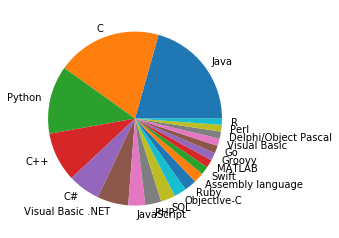

In [48]:
import matplotlib.pyplot as plt
my_colors = ['b', 'r', 'c', 'y', 'g', 'm']
progs_2.plot.pie(subplots=True,
               legend=False)
plt.ylabel('')